In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib
import time

In [2]:
u_val = lambda t,sd: max((3+np.random.normal(scale=sd) if 1<t<5 else 1+np.random.normal(scale=sd)),0.01)


In [3]:
T = np.linspace(0,10,1000)
u_arr = [u_val(t,0.01) for t in T]

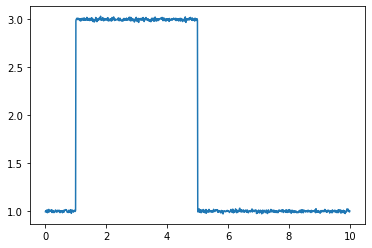

In [4]:
plt.plot(T,u_arr)
plt.show()

In [5]:
# solve steady state in short time scales

u=Symbol('u')
b1=Symbol('b1')
b2=Symbol('b2')
b3=Symbol('b3')
a1=Symbol('a1')
a2=Symbol('a2')
a3=Symbol('a3')
x1=Symbol('x1')
x2=Symbol('x2')
x3=Symbol('x3')
h=Symbol('h')
P=Symbol('P')
A=Symbol('A')

s=Symbol('s')
D=Symbol('D')


In [6]:
start_time = time.time()

#simplified equation
stst=solve([u/(h*x3)-x1,x1*P/x3-x2,x2*A-x3],[x1,x2,x3])

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.898320198059082 seconds ---


In [10]:
stst[0][2]

(A*P*u/h)**(1/3)

In [8]:
fast_ss = stst[0] 
[x1_ss,x2_ss,x3_ss] = fast_ss


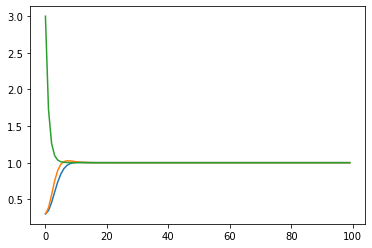

In [9]:
def depEqsCC2(y,t,fast_ss,DD=1,uu=1,aa=1,bb=1,TT=1.5):
    dy=np.empty(3)
    [x1_ss,x2_ss,x3_ss] = [ss.subs({u:uu,D:DD,A:y[0],P:y[1],h:y[2]}) for ss in fast_ss]
    dy[0]= y[0]*x2_ss-y[0] #Adrenal cells
    dy[1]= y[1]*x1_ss-y[1] #Pituitary cells
    dy[2]= 1*DD/(aa+bb*np.heaviside(float(x3_ss-TT),0))-y[2] #Hippocampal cells

    return dy

t=np.linspace(0,100,100)
sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss),[0.3,0.3,3],t)

plt.plot(sol)
plt.show()



<ipython-input-12-e5e37f327327>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,1)
<ipython-input-12-e5e37f327327>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,2,3)
<ipython-input-12-e5e37f327327>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

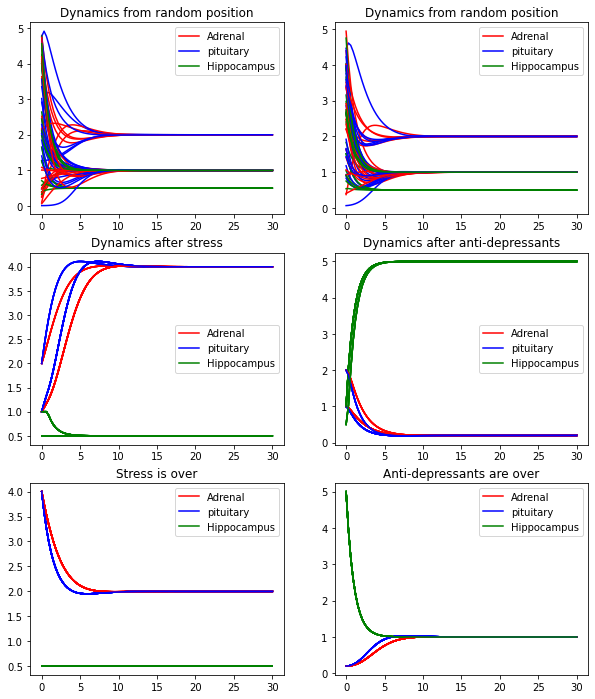

In [12]:
# take around 5 minutes.
def plot_dat(t,sol,u=1,c=1):
    plt.plot(t,sol[:,0],'r')
    plt.plot(t,sol[:,1],'b')
    plt.plot(t,sol[:,2],'g')
    plt.legend(['Adrenal','pituitary','Hippocampus'])
    
t=np.linspace(0,30,100)
fig=plt.figure(figsize=(10,12))

for i in range(20):
    sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss),[5*np.random.rand(),5*np.random.rand(),5*np.random.rand()],t)
    plt.subplot(3,2,1)
    plot_dat(t,sol)
    plt.title('Dynamics from random position')
    sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss,uu=2),sol[-1,:],t)
    plt.subplot(3,2,3)
    plot_dat(t,sol)
    plt.title('Dynamics after stress')
    sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss,uu=1),sol[-1,:],t)
    plt.subplot(3,2,5)
    plot_dat(t,sol)
    plt.title('Stress is over')
    
    sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss),[5*np.random.rand(),5*np.random.rand(),5*np.random.rand()],t)
    plt.subplot(3,2,2)
    plot_dat(t,sol)
    plt.title('Dynamics from random position')
    sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss,uu=1,DD=5),sol[-1,:],t)
    plt.subplot(3,2,4)
    plot_dat(t,sol)
    plt.title('Dynamics after anti-depressants')
    sol=odeint(lambda y,t:depEqsCC2(y,t,fast_ss, uu=1,DD=1),sol[-1,:],t)
    plt.subplot(3,2,6)
    plot_dat(t,sol)
    plt.title('Anti-depressants are over')


In [16]:
# simplified 2-D slow dynamics. Here we asuume A=P.
def depEqs(y,t,fast_ss,DD=1,uu=1,aa=1,bb=1,TT=1.5):
    dy=np.empty(2)
    [x1_ss,x2_ss,x3_ss] = [ss.subs({u:uu,D:DD,A:y[0],P:y[0],h:y[1]}) for ss in fast_ss]
    dy[0]= y[0]*x2_ss-y[0] #Adrenal cells
    dy[1]= 1*DD/(aa+bb*np.heaviside(float(x3_ss-TT),0))-y[1] #Hippocampal cells

    return dy

In [17]:
# 2D
# takes a few minutes

from matplotlib.lines import Line2D

def plot_dynamics(fast_ss,uu=1,DD=1,aa=1,bb=1,TT=1.5, rnge = [0.01,5], resolution = 0.05):
    start = rnge[0]
    end = rnge[1]
    xA=np.arange(start,end,resolution)
    xh=np.arange(start,end,resolution)
    #xA=np.logspace(-1,1,100)
    #xH=np.logspace(-1,1,100)
    
    nA=xA.shape[0]
    nh=xh.shape[0]
    
    contA=np.zeros([nA,nh])
    conth=np.zeros([nA,nh])
    for iA in range(nA):
        for ih in range(nh):
            # here, we assume P=A. maybe analyze separately later.
            [x1_ss,x2_ss,x3_ss] = [ss.subs({u:uu,D:DD,A:xA[iA],P:xA[iA],h:xh[ih]}) for ss in fast_ss]
            #contA[iA,ih]=c_h+(1-xA[iA]/k_h)*xA[iA]*x2_ss-xA[iA]
            #conth[iA,ih]=c_h+(1-xh[ih]/k_h)*xh[ih]*s_ss-xh[ih]
            
            contA[iA,ih]=xA[iA]*x2_ss-xA[iA]
            conth[iA,ih]=1*DD/(aa+bb*np.heaviside(float(x3_ss-TT),0))-xh[ih]
    
    #plot A and h
       
    #'''
    plt.figure()
    csA = plt.contour(xA,xh,contA.T,levels=[0],colors='red',linewidths=3)
    csh = plt.contour(xA,xh,conth.T,levels=[0],colors='blue',linewidths=3)
    plt.xlabel('Adrenal volume')
    plt.ylabel('Hippocampal volume')

    legend_elements = [Line2D([0], [0], color='red', lw=3, label="A'=0"),
                       Line2D([0], [0], color='blue', lw=3, label="H'=0")]
    
    #plot_stream plot
    plt.streamplot(xA,xh,contA.T,conth.T,color='gray', density = 4)
    plt.xlabel('Adrenal volume')
    plt.ylabel('Hippocampal volume')
    plt.title('Stress = '+str(uu)+', Antidep. = '+str(DD))
    
    #plot hysteresis trejectories
    #plot_hysteresis()
    
    #show plot
    plt.legend(handles=legend_elements,loc=1)
    plt.xlim([0,4.5])
    plt.ylim([0,3])
    plt.show()
    #return
    '''
    '''
    
    # grab nullclines and find zeros
    #dAnull = csA.collections[0].get_paths()[0]
    #dhnull = csh.collections[0].get_paths()[0]  
    #coor_dAnull = dAnull.vertices
    #coor_dhnull = dhnull.vertices
    
    #zeros = find_zeros(coor_dAnull,coor_dhnull,resolution=resolution)

    #return zeros
    return
    #'''
    
    

In [11]:
#Show the two fixed points
def plot_trajectories(uu=1,DD=1,y0=(1,1)):
    plt.figure()
    t=np.linspace(0,50,300)
    sol=odeint(lambda y,t:depEqs(y,t,fast_ss,DD=DD,uu=uu),y0,t)
    plt.plot(sol[:,0],sol[:,1])
    plt.xlabel('Adrenal')
    plt.ylabel('Hippocampus')
    return

In [12]:
#Show the two fixed points
def plot_hysteresis():
    
    # first dynamic - from healthy to depressed
    t=np.linspace(0,50,300)
    sol=odeint(lambda y,t:depEqs(y,t,fast_ss,DD=1,uu=2),(1,1),t)
    first_ss = (sol[-1,0],sol[-1,1])
    plt.plot(sol[:,0],sol[:,1], label = 'prolonged stress',linewidth=3)

    # second dynamic - stress is removed
    t=np.linspace(0,50,300)
    sol=odeint(lambda y,t:depEqs(y,t,fast_ss,DD=1,uu=1),first_ss,t)
    second_ss = (sol[-1,0],sol[-1,1])     
    plt.plot(sol[:,0],sol[:,1], label = 'stress is removed',linewidth=3)
    
    # third dynamic - treatment
    t=np.linspace(0,50,300)
    sol=odeint(lambda y,t:depEqs(y,t,fast_ss,DD=2,uu=1),second_ss,t)
    third_ss = (sol[-1,0],sol[-1,1])     
    plt.plot(sol[:,0],sol[:,1], label = 'treatment',linewidth=3)
    
    # fourth dynamic - treatment
    t=np.linspace(0,50,300)
    sol=odeint(lambda y,t:depEqs(y,t,fast_ss,DD=1,uu=1),third_ss,t)
    plt.plot(sol[:,0],sol[:,1], label = 'treatment is over',linewidth=3)
    
    #plt.xlabel('Adrenal')
    #plt.ylabel('Hippocampus')
    #plt.legend()
    #plt.title('hysteresis')
    return

In [13]:
def get_catastrophe_coor_uD(fast_ss, u_range, D_range):
    catastrophe_coor = []
    for u in u_range:
        print(u)
        for D in D_range:
            print(D)
            zeros = plot_dynamics(fast_ss,uu=u, DD=D, resolution = 0.1)
            print(zeros)
            A_values = [zero[0] for zero in zeros]
            for A in A_values:
                catastrophe_coor += [[u,D,A]]
    
    return catastrophe_coor

In [14]:
def find_zeros(line1,line2,resolution = 0.05, delta = 0.2):
    
    epsilon = resolution/2
    
    def dist(x1,x2):
        return ((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)**0.5

    potential_zeros = []
    for adot in line1:
        for hdot in line2:
            if dist(adot,hdot) < epsilon:
                potential_zeros += [adot]
    real_zeros = []
    for i in range(len(potential_zeros)):
        potential = potential_zeros[i]
        is_new_zero = np.array([dist(potential,zero)>delta for zero in real_zeros]).all()
        if is_new_zero:
            real_zeros += [potential]
            
    return real_zeros
            

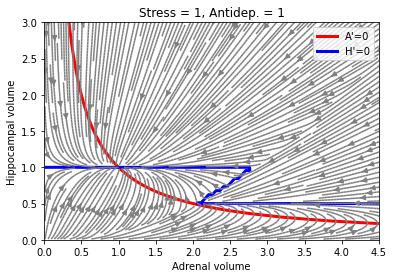

In [20]:
plot_dynamics(fast_ss,uu=1,TT=2)

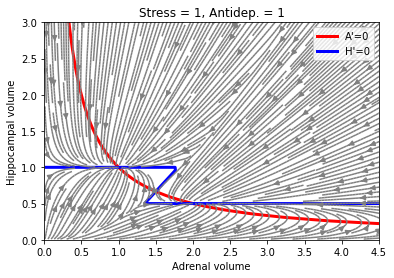

In [19]:
plot_dynamics(fast_ss,uu=1)

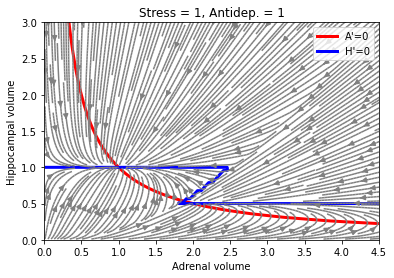

In [22]:
plot_dynamics(fast_ss,uu=1,TT=1.85)

In [ ]:
start_time = time.time()

gcc = get_catastrophe_coor_uD(fast_ss, np.arange(0.7,1.8,0.1),[1])

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
gcc = np.array(gcc)

In [ ]:
plt.scatter(gcc[:,0],gcc[:,2])
plt.xlabel('stress input')
plt.ylabel('Adrenal volume')

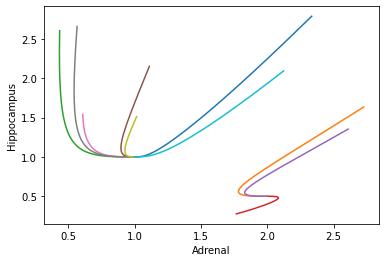

In [67]:
def depModelSlow(y,t,uf=lambda t:1,cf=lambda t:1):
    x2=x2_ss.subs({u:uf(t),A:y[0],P:y[0],c:cf(t),h:y[1]})
    x3=x3_ss.subs({u:uf(t),A:y[0],P:y[0],c:cf(t),h:y[1]})
    dy=np.empty(2)
    dy[0]=y[0]*(x2-1)
    dy[1] = 1/(1+1*np.heaviside(float(x3-1.5),0))-y[1]
    return dy

#t=np.linspace(0,50,300)
#sol=odeint(lambda y,t:depModelSlow(y,t),[1,2],t)
#plt.plot(sol)


#Show the two fixed points
def plot_random_trajectories():
    plt.figure()
    for i in range(10):
        t=np.linspace(0,50,300)
        sol=odeint(lambda y,t:depModelSlow(y,t),3*np.random.rand(2),t)
        plt.plot(sol[:,0],sol[:,1])
    plt.xlabel('Adrenal')
    plt.ylabel('Hippocampus')

plot_random_trajectories()

Text(0.5,1,'Effect of short stressor')

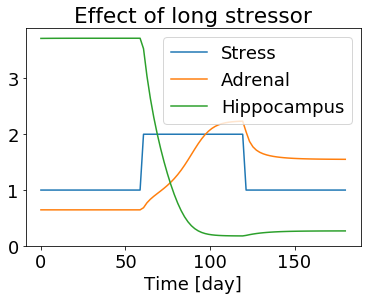

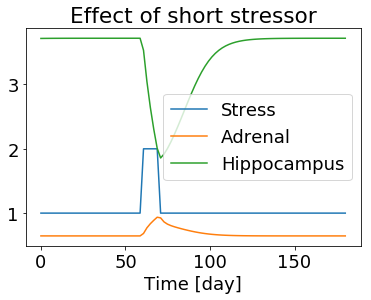

In [149]:
#Stressors change fixed point to depressed state
def bump_func(t,st=30,en=60):
    if t>st and t<en:
        return 1.2
    return 1

t=np.linspace(0,30,30)
sol=odeint(depModelSlow,[0.5,2],t)
t=np.linspace(0,90,90)
sol=odeint(lambda y,t:depModelSlow(y,t,uf=lambda t: bump_func(t,st=30,en=60)),sol[-1,:],t)
plt.plot(2*t,[bump_func(t0) for t0 in t])
plt.plot(2*t,sol)
plt.xlabel('Time [day]')
plt.legend(['Stress','Adrenal','Hippocampus'])
plt.title('Effect of long stressor')


plt.figure()
t=np.linspace(0,30,30)
sol=odeint(depModelSlow,[0.5,2],t)
t=np.linspace(0,90,90)
sol=odeint(lambda y,t:depModelSlow(y,t,uf=lambda t: bump_func(t,st=30,en=35)),sol[-1,:],t)
plt.plot(2*t,[bump_func(t0,st=30,en=35) for t0 in t])
plt.plot(2*t,sol)
plt.xlabel('Time [day]')
plt.legend(['Stress','Adrenal','Hippocampus'])
plt.title('Effect of short stressor')


(0, 5.5)

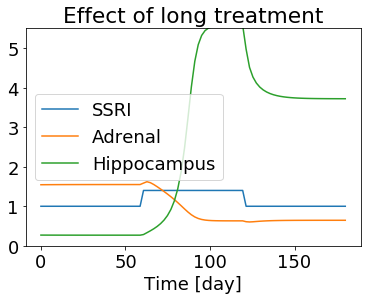

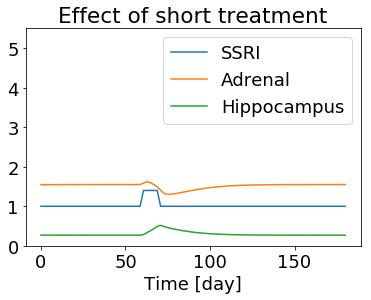

In [154]:
#SSRI change fixed point to normal state
def bump_func(t,st=30,en=60):
    if t>st and t<en:
        return 1.4
    return 1

t=np.linspace(0,30,30)
sol=odeint(depModelSlow,[2,0.5],t)
t=np.linspace(0,90,90)
sol=odeint(lambda y,t:depModelSlow(y,t,cf=lambda t: bump_func(t,st=30,en=60)),sol[-1,:],t)
plt.plot(2*t,[bump_func(t0) for t0 in t])
plt.plot(2*t,sol)
plt.xlabel('Time [day]')
plt.legend(['SSRI','Adrenal','Hippocampus'])
plt.title('Effect of long treatment')
plt.ylim([0,5.5])


plt.figure()
t=np.linspace(0,30,30)
sol=odeint(depModelSlow,[2,0.5],t)
t=np.linspace(0,90,90)
sol=odeint(lambda y,t:depModelSlow(y,t,cf=lambda t: bump_func(t,st=30,en=35)),sol[-1,:],t)
plt.plot(2*t,[bump_func(t0,st=30,en=35) for t0 in t])
plt.plot(2*t,sol)
plt.xlabel('Time [day]')
plt.legend(['SSRI','Adrenal','Hippocampus'])
plt.title('Effect of short treatment')
plt.ylim([0,5.5])


Text(0.5,0,'Time [min]')

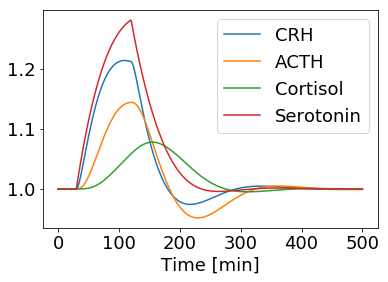

In [162]:
def depModelFast(t,y,uf=lambda t:1,cf=lambda t:1):
    dy=np.empty(4)
    x1,x2,x3,s=y
    dy[0]=1/5*(uf(t)*s/x3-x1)
    dy[1]=1/30*(x1/x3-x2)
    dy[2]=1/90*(x2-x3)
    dy[3]=1/60*(cf(t)/x3-s)#Don't know s timescale...
    return dy

def bump_func(t,st=30,en=60):
    if t>st and t<en:
        return 1.4
    return 1

t=np.linspace(0,500,500)
sol=odeint(lambda y,t:depModelFast(t,y,cf=lambda t: bump_func(t,st=30,en=120)),[1,1,1,1],t)

plt.plot(t,sol)
plt.legend(['CRH','ACTH','Cortisol','Serotonin'])
plt.xlabel('Time [min]')